In [1]:
pip uninstall pillow

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install image

  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=e403af00bedc825d5195c7545be39a4ecd09862b267eddb63da9b8ead457e657
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\14\4c\7c\d9b5c35a149d3bc8c72c7e92372913ff7dac9c6bd94bd1b8c9
Successfully built image
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade matplotlib

In [1]:
import pandas as pd 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import tensorflow as tf
from skimage import feature
from skimage.filters import sobel
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
#Checking if GPU is available
tf.test.gpu_device_name()
tf.test.is_gpu_available(cuda_only=False)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
dataset = pd.read_csv('fer2013/fer2013.csv')
emotions_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
dataset['emotion'] = dataset['emotion'].map(emotions_names)
train = dataset[dataset["Usage"] == "Training"]
test = dataset[dataset["Usage"] == "PublicTest"]
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18712\828878538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
C:\Users\DELL\AppData\Local\Temp\ipykernel_18712\828878538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))


In [ ]:
#import data

In [3]:
dataset.head()

,emotion,pixels,Usage
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
dataset[dataset['emotion'] == 'Angry'].head()

,emotion,pixels,Usage
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,Training
10,Angry,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
22,Angry,123 125 124 142 209 226 234 236 231 232 235 22...,Training
23,Angry,8 9 14 21 26 32 37 46 52 62 72 70 71 73 76 83 ...,Training


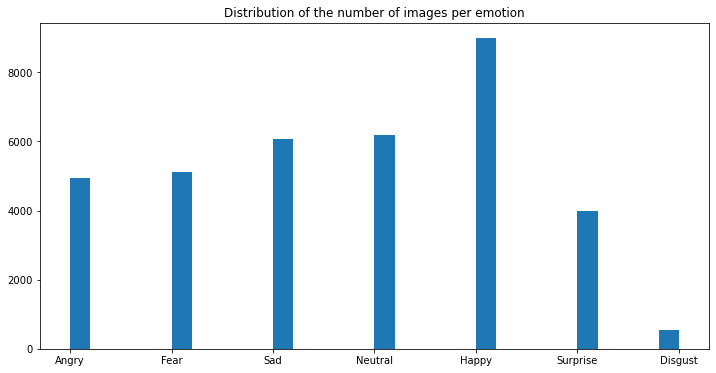

In [5]:
plt.figure(figsize=(12,6))
plt.hist(dataset['emotion'], bins=30)
plt.title("Distribution of the number of images per emotion")
plt.show()

In [6]:
train.shape

(28709, 3)

In [7]:
test.shape

(3589, 3)

In [8]:
#Create the data set

In [9]:
dataset = pd.read_csv('fer2013/fer2013.csv')
train = dataset[dataset["Usage"] == "Training"]
test = dataset[dataset["Usage"] == "PublicTest"]
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
dataset['pixels'] = dataset['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18712\524007100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
C:\Users\DELL\AppData\Local\Temp\ipykernel_18712\524007100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))


In [10]:
train.shape

(28709, 3)

In [11]:
test.shape

(3589, 3)

In [12]:
shape_x = 48
shape_y = 48
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values
X = dataset.iloc[:,1].values
y = dataset.iloc[:,0].values
#np.vstack stack arrays in sequence vertically (picking element row wise)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
X = np.vstack(X)
#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
X = np.reshape(X, (X.shape[0],48,48,1))
y = np.reshape(y, (y.shape[0],1))

In [13]:
print("Shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("Shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")

Shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
Shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [14]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')
X = X.astype('float32')
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255
X /= 255
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)




In [17]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0. 1.]


In [16]:
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

In [14]:
#Defining labels 
def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

Text(0.5, 1.0, 'Ground Truth : Sad')

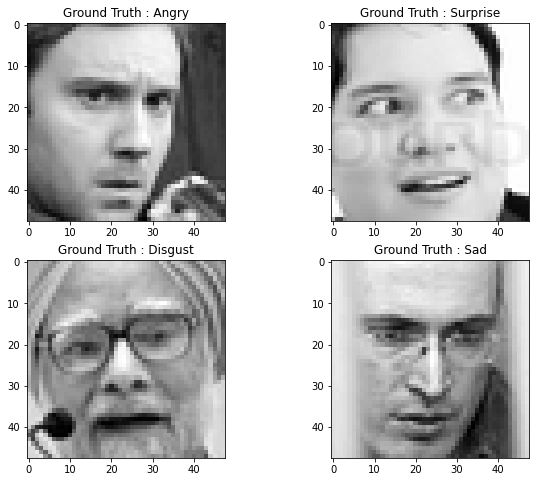

In [15]:
plt.figure(figsize=[10,8])

# Display the first image in training data
plt.subplot(221)
plt.imshow(np.squeeze(X_train[0,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[0]))))

# Display the first image in testing data
plt.subplot(222)
plt.imshow(np.squeeze(X_test[1500,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))

plt.subplot(223)
plt.imshow(np.squeeze(X_train[1,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1]))))

plt.subplot(224)
plt.imshow(np.squeeze(X_test[1502,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1502]))))


In [18]:
np.save('X_train', X_train)
np.save('X_test', X_test)

np.save('y_train', y_train)
np.save('y_test', y_test)


In [19]:
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28709, 48, 48, 1)
(28709, 1)
(3589, 48, 48, 1)
(3589, 1)


In [21]:
X_train[0]

array([[[ 70.],
        [ 80.],
        [ 82.],
        ...,
        [ 52.],
        [ 43.],
        [ 41.]],

       [[ 65.],
        [ 61.],
        [ 58.],
        ...,
        [ 56.],
        [ 52.],
        [ 44.]],

       [[ 50.],
        [ 43.],
        [ 54.],
        ...,
        [ 49.],
        [ 56.],
        [ 47.]],

       ...,

       [[ 91.],
        [ 65.],
        [ 42.],
        ...,
        [ 72.],
        [ 56.],
        [ 43.]],

       [[ 77.],
        [ 82.],
        [ 79.],
        ...,
        [105.],
        [ 70.],
        [ 46.]],

       [[ 77.],
        [ 72.],
        [ 84.],
        ...,
        [106.],
        [109.],
        [ 82.]]])